# Preparing for modeling

In [1]:
# Preparing for modeling
# includes merging data into a single table, finding the right
# row granularity for analysis, and engineering new features


# topics to cover
# differences btw data prep for EDA AND data prep for modeling
# creating a single table
# preparing rows and columns
# feature engineering
# preview: modeling


## Case study: Data science intern for Maven Mega Mart

In [2]:
# Case study: Data science intern for Maven Mega Mart

# Scope: Identify customers that are most likely to purchase dog food

# Technique: Supervised learning
# (using historical data to predict the future)

# Label (y): Whether a customer has purchased dog food recently or not

# Features (x):
# What other items a customer has purchased 
# How much money a customer has spent
# etc.

In [3]:
## Data Prep: EDA vs Modeling

# Note: Modeling refers to applying an algorithm, which is different from "data modelling",
# where the goal is to visually show the relationship between the tables in a relational 
# database

**To prepare for modeling** means to transform the data into a structure
and format that can be used as a direct input for a machine learning algorithm.

You can prepare your data for modeling by:
    
1. creating a single table
2. Setting the correct row granularity
3. Ensuring each column is non-null and numeric
4. Engineering features for the model

### Creating a single table

There are two ways to combine multiple tables into a single table:
    
* **Appending** - *stacks the rows from multiple tables with the same column structure*
* **Joining** - *adds related columns from one tables to another, based on common values*

### Appending 

Use **pd.concat()** to append or vertically stack, multiple dataframes

The columns for the dataframes must be identical
**pd.concat([df_1, df_2, ...])** will stack the rows from df_2 at the bottom of df_1

change the axis to axis=1, to join the dataframes horizontally

In [4]:
# read in text files

import pandas as pd
ca = pd.read_csv('Data/happiness_data_ca.txt')
mx = pd.read_csv('Data/happiness_data_mx.txt')
us = pd.read_csv('Data/happiness_data_us.txt')
cr = pd.read_csv('Data/happiness_data_cr.txt')

In [5]:
# canada data
ca.head(2)

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Canada,2005,7.418048,0.961552,0.957306,70.500000
1,Canada,2007,7.481753,NaN,0.930341,70.620003


In [6]:
# mexico data
mx.head(2)

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Mexico,2005,6.580658,0.902808,0.813745,64.400002
1,Mexico,2007,6.525378,0.878806,0.670430,64.680000


In [7]:
# us data -- missing last column

us.head(2)

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices
0,United States,2006,7.181794,0.964572,0.911496
1,United States,2007,7.512688,NaN,0.871904


In [8]:
# costa rica data -- forsy column has different name

cr.head(2)

,nombre del país,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Costa Rica,2006,7.082465,0.936938,0.882420,68.559998
1,Costa Rica,2007,7.432132,0.917678,0.922736,68.720001


In [9]:
# append the data

pd.concat([ca, mx]).tail()

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
11,Mexico,2017,6.410299,0.799839,0.861405,65.800003
12,Mexico,2018,6.549579,0.858069,0.816200,65.800003
13,Mexico,2019,6.431945,0.851686,0.903384,65.800003
14,Mexico,2020,5.964221,0.778816,0.873347,65.800003
15,Mexico,2021,5.990751,0.778605,0.837159,65.800003


In [10]:
# concat mexico, canada and the usa, costa rica

pd.concat([ca, mx, us, cr]).head()

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth,nombre del país
0,Canada,2005,7.418048,0.961552,0.957306,70.500000,NaN
1,Canada,2007,7.481753,NaN,0.930341,70.620003,NaN
2,Canada,2008,7.485604,0.938707,0.926315,70.680000,NaN
3,Canada,2009,7.487824,0.942845,0.915058,70.739998,NaN
4,Canada,2010,7.650346,0.953765,0.933949,70.800003,NaN


In [11]:
# rename the column before concatenating them
# the index values are from the original dataframe, use .reset_index() to reset the index

pd.concat([ca, mx, us, cr.rename(columns = {'nombre del país': 'country_name'})]).reset_index(drop=True)

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Canada,2005,7.418048,0.961552,0.957306,70.500000
1,Canada,2007,7.481753,NaN,0.930341,70.620003
2,Canada,2008,7.485604,0.938707,0.926315,70.680000
3,Canada,2009,7.487824,0.942845,0.915058,70.739998
4,Canada,2010,7.650346,0.953765,0.933949,70.800003
...,...,...,...,...,...,...
59,Costa Rica,2017,7.225182,0.921697,0.935618,70.000000
60,Costa Rica,2018,7.141075,0.875872,0.941888,70.000000
61,Costa Rica,2019,6.997619,0.906077,0.926830,70.000000
62,Costa Rica,2020,6.338472,0.834200,0.889400,70.000000


### Joining Data

Use .merge() to join two Dataframes based on common values in a column(s)

* The dataframes must have at least one column with matching values
* This is different from the pandas a .join method, which joins dataframes on their indices

left_df.merge(right_df, how, left_on, right_on)

### Merge

In [12]:
# read in spreadsheet

sales_may = pd.read_excel('Data/Sales Tables.xlsx', sheet_name=0)
sales_june = pd.read_excel('Data/Sales Tables.xlsx', sheet_name=1)
regions = pd.read_excel('Data/Sales Tables.xlsx', sheet_name=2)

In [13]:
sales_may

,date,store,sales
0,2022-05-01,1,341
1,2022-05-01,2,291
2,2022-05-01,3,493
3,2022-05-01,4,428
4,2022-05-01,5,152


In [14]:
regions

,store,region
0,2,North
1,3,East
2,4,West
3,8,South


In [15]:
sales_may.merge(regions) # default join is how=inner

,date,store,sales,region
0,2022-05-01,2,291,North
1,2022-05-01,3,493,East
2,2022-05-01,4,428,West


In [16]:
# left join

sales_may.merge(regions, how='left', left_on='store', right_on='store')

,date,store,sales,region
0,2022-05-01,1,341,NaN
1,2022-05-01,2,291,North
2,2022-05-01,3,493,East
3,2022-05-01,4,428,West
4,2022-05-01,5,152,NaN


In [17]:
# we can do on='store'

sales_may.merge(regions, how='left', on='store')

,date,store,sales,region
0,2022-05-01,1,341,NaN
1,2022-05-01,2,291,North
2,2022-05-01,3,493,East
3,2022-05-01,4,428,West
4,2022-05-01,5,152,NaN


### Types of Joins

how = 'inner'\
how = 'left'\
how = 'right'\
how = 'outer'

In [18]:
# only look at 2020's data

happy_scores = pd.concat([ca, mx, us, cr.rename(columns = {'nombre del país': 'country_name'})]).reset_index(drop=True)
happy_scores = happy_scores[happy_scores["year"] > 2019]
happy_scores

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
14,Canada,2020,7.024905,0.930611,0.886892,71.349998
15,Canada,2021,6.939435,0.926076,0.898229,71.400002
30,Mexico,2020,5.964221,0.778816,0.873347,65.800003
31,Mexico,2021,5.990751,0.778605,0.837159,65.800003
46,United States,2020,7.028088,0.937370,0.850447,NaN
47,United States,2021,6.959088,0.920009,0.815735,NaN
62,Costa Rica,2020,6.338472,0.834200,0.889400,70.000000
63,Costa Rica,2021,6.408448,0.876052,0.886652,70.000000


In [19]:
# population by country in North America

pop = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)")[0]
pop = pop[pop["UN Statistical Subregion[1]"] == 'Northern America']
pop

,Country,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
3,United States,341534046,343477335,+0.57%,Americas,Northern America
38,Canada,38821259,39299105,+1.23%,Americas,Northern America
207,Bermuda (United Kingdom),64749,64698,−0.08%,Americas,Northern America
209,Greenland (Denmark),54990,55922,+1.69%,Americas,Northern America
231,Saint Pierre and Miquelon (France),5732,5681,−0.89%,Americas,Northern America


In [20]:
# merge the 2 dataframes with an innere join

happy_scores.merge(pop, how='inner', left_on='country_name', right_on='Country')

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth,Country,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,Canada,2020,7.024905,0.930611,0.886892,71.349998,Canada,38821259,39299105,+1.23%,Americas,Northern America
1,Canada,2021,6.939435,0.926076,0.898229,71.400002,Canada,38821259,39299105,+1.23%,Americas,Northern America
2,United States,2020,7.028088,0.937370,0.850447,NaN,United States,341534046,343477335,+0.57%,Americas,Northern America
3,United States,2021,6.959088,0.920009,0.815735,NaN,United States,341534046,343477335,+0.57%,Americas,Northern America


In [21]:
# outer join
# an outer join will include all the rows from both table

happy_scores.merge(pop, how='outer', left_on='country_name', right_on='Country')

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth,Country,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,Canada,2020.0,7.024905,0.930611,0.886892,71.349998,Canada,38821259.0,39299105.0,+1.23%,Americas,Northern America
1,Canada,2021.0,6.939435,0.926076,0.898229,71.400002,Canada,38821259.0,39299105.0,+1.23%,Americas,Northern America
2,Mexico,2020.0,5.964221,0.778816,0.873347,65.800003,NaN,NaN,NaN,NaN,NaN,NaN
3,Mexico,2021.0,5.990751,0.778605,0.837159,65.800003,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2020.0,7.028088,0.937370,0.850447,NaN,United States,341534046.0,343477335.0,+0.57%,Americas,Northern America
5,United States,2021.0,6.959088,0.920009,0.815735,NaN,United States,341534046.0,343477335.0,+0.57%,Americas,Northern America
6,Costa Rica,2020.0,6.338472,0.834200,0.889400,70.000000,NaN,NaN,NaN,NaN,NaN,NaN
7,Costa Rica,2021.0,6.408448,0.876052,0.886652,70.000000,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,Bermuda (United Kingdom),64749.0,64698.0,−0.08%,Americas,Northern America
9,NaN,NaN,NaN,NaN,NaN,NaN,Greenland (Denmark),54990.0,55922.0,+1.69%,Americas,Northern America


In [22]:
# left join
# returns all the data from the left table and
# corresponding rows from the right table

happy_scores.merge(pop, how='left', left_on='country_name', right_on='Country')

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth,Country,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,Canada,2020,7.024905,0.930611,0.886892,71.349998,Canada,38821259.0,39299105.0,+1.23%,Americas,Northern America
1,Canada,2021,6.939435,0.926076,0.898229,71.400002,Canada,38821259.0,39299105.0,+1.23%,Americas,Northern America
2,Mexico,2020,5.964221,0.778816,0.873347,65.800003,NaN,NaN,NaN,NaN,NaN,NaN
3,Mexico,2021,5.990751,0.778605,0.837159,65.800003,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2020,7.028088,0.937370,0.850447,NaN,United States,341534046.0,343477335.0,+0.57%,Americas,Northern America
5,United States,2021,6.959088,0.920009,0.815735,NaN,United States,341534046.0,343477335.0,+0.57%,Americas,Northern America
6,Costa Rica,2020,6.338472,0.834200,0.889400,70.000000,NaN,NaN,NaN,NaN,NaN,NaN
7,Costa Rica,2021,6.408448,0.876052,0.886652,70.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# we can flip the left join from the right join

happy_scores.merge(pop, how='right', left_on='country_name', right_on='Country')

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth,Country,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,United States,2020.0,7.028088,0.937370,0.850447,NaN,United States,341534046,343477335,+0.57%,Americas,Northern America
1,United States,2021.0,6.959088,0.920009,0.815735,NaN,United States,341534046,343477335,+0.57%,Americas,Northern America
2,Canada,2020.0,7.024905,0.930611,0.886892,71.349998,Canada,38821259,39299105,+1.23%,Americas,Northern America
3,Canada,2021.0,6.939435,0.926076,0.898229,71.400002,Canada,38821259,39299105,+1.23%,Americas,Northern America
4,NaN,NaN,NaN,NaN,NaN,NaN,Bermuda (United Kingdom),64749,64698,−0.08%,Americas,Northern America
5,NaN,NaN,NaN,NaN,NaN,NaN,Greenland (Denmark),54990,55922,+1.69%,Americas,Northern America
6,NaN,NaN,NaN,NaN,NaN,NaN,Saint Pierre and Miquelon (France),5732,5681,−0.89%,Americas,Northern America


## 3. Create a Single Table

In [24]:
# connect to a sql database
import pandas as pd
import sqlite3

conn = sqlite3.connect('Data/online_shop.db')

In [25]:
# view the transactions table
transactions = pd.read_sql('SELECT * FROM transactions', conn)
transactions.head()

,customer,item_id,purchase_date
0,Ava,1011,4/1/23
1,Ava,1014,4/1/23
2,Ava,1015,4/15/23
3,Ava,1018,5/1/23
4,Ben,2345,4/15/23


In [26]:
# view the items table

items = pd.read_sql('SELECT * FROM items', conn)
items.head()

,item_id,item_description,price,category,rating
0,1011,Paint,$15.99,Arts & Crafts,3.5
1,1012,Crayons,$2.87,Arts & Crafts,4.7
2,1013,Markers,$2.50,Arts & Crafts,4.8
3,1014,Brush,$1.99,Arts & Crafts,4.2
4,1015,Paper,$22.49,Arts & Crafts,4.5


In [27]:
# merge the 2 tables together

df = transactions.merge(items, how='left', on='item_id')
df

,customer,item_id,purchase_date,item_description,price,category,rating
0,Ava,1011,4/1/23,Paint,$15.99,Arts & Crafts,3.5
1,Ava,1014,4/1/23,Brush,$1.99,Arts & Crafts,4.2
2,Ava,1015,4/15/23,Paper,$22.49,Arts & Crafts,4.5
3,Ava,1018,5/1/23,Scissors,$3.50,Arts & Crafts,4.6
4,Ben,2345,4/15/23,Dog Food,$29.99,Pet Supplies,4.9
...,...,...,...,...,...,...,...
105,Jenny,1011,4/20/23,Paint,$15.99,Arts & Crafts,3.5
106,Jenny,1014,4/20/23,Brush,$1.99,Arts & Crafts,4.2
107,Jenny,1018,4/20/23,Scissors,$3.50,Arts & Crafts,4.6
108,Jenny,1012,4/20/23,Crayons,$2.87,Arts & Crafts,4.7


### Preparing Rows for Modeling

To prepare rows for modeling, you need to think about the questions you are trying to
answer and determine what one row(observation) of your table will look like.

In other words, you need to determine the *granularity* of each row.

**Goal:** *Predict which customers are most likely to buy dog food in June*

*Because we are predicting something for a customer, one row of data in the table should represent ***one customer****

The y-variable will represent our label/output\
The x-variable will represent our features to be input into a model

In [28]:
# goal: predict which customers are most likely to buy dog food in june
## each row should contain data for one customer
## y: june dog food purchases
## x: aggregation based on april and may data

In [29]:
# looking at our dataframe again

df

,customer,item_id,purchase_date,item_description,price,category,rating
0,Ava,1011,4/1/23,Paint,$15.99,Arts & Crafts,3.5
1,Ava,1014,4/1/23,Brush,$1.99,Arts & Crafts,4.2
2,Ava,1015,4/15/23,Paper,$22.49,Arts & Crafts,4.5
3,Ava,1018,5/1/23,Scissors,$3.50,Arts & Crafts,4.6
4,Ben,2345,4/15/23,Dog Food,$29.99,Pet Supplies,4.9
...,...,...,...,...,...,...,...
105,Jenny,1011,4/20/23,Paint,$15.99,Arts & Crafts,3.5
106,Jenny,1014,4/20/23,Brush,$1.99,Arts & Crafts,4.2
107,Jenny,1018,4/20/23,Scissors,$3.50,Arts & Crafts,4.6
108,Jenny,1012,4/20/23,Crayons,$2.87,Arts & Crafts,4.7


In [30]:
# data types

df.dtypes

customer            object
item_id              int64
purchase_date       object
item_description    object
price               object
category            object
rating              object
dtype: object

In [31]:
# convert data types to datetime and numeric fields

df["purchase_date"] = pd.to_datetime(df["purchase_date"])
df["price"] = pd.to_numeric(df["price"].str.replace('$', '', regex=True))
df["rating"] = pd.to_numeric(df["rating"])

In [32]:
# updated data types

df.dtypes

customer                    object
item_id                      int64
purchase_date       datetime64[ns]
item_description            object
price                      float64
category                    object
rating                     float64
dtype: object

In [33]:
# for our x column, create a subset of april and may data

df_april_may = df[df["purchase_date"].dt.month < 6]
df_april_may.head()

,customer,item_id,purchase_date,item_description,price,category,rating
0,Ava,1011,2023-04-01,Paint,15.99,Arts & Crafts,3.5
1,Ava,1014,2023-04-01,Brush,1.99,Arts & Crafts,4.2
2,Ava,1015,2023-04-15,Paper,22.49,Arts & Crafts,4.5
3,Ava,1018,2023-05-01,Scissors,3.50,Arts & Crafts,4.6
4,Ben,2345,2023-04-15,Dog Food,29.99,Pet Supplies,4.9


In [34]:
# for our y column, create a subset of june data

df_june = df[df["purchase_date"].dt.month == 6]
df_june.head()

,customer,item_id,purchase_date,item_description,price,category,rating
6,Ben,2345,2023-06-15,Dog Food,29.99,Pet Supplies,4.9
12,Chloe,2345,2023-06-06,Dog Food,29.99,Pet Supplies,4.9
24,Blake,2545,2023-06-10,Cat Food,25.55,Pet Supplies,4.2
34,Maxwell,5674,2023-06-02,Video Game,30.99,Games & Toys,4.1
36,Isabel,3811,2023-06-15,Socks,7.50,Apparel,3.7


In [35]:
# create a column of june dog food purchases

# first, for each customer how much dog food did they buy in June

dog_food_rows = df_june[df_june["item_description"] == 'Dog Food']

dog_food_rows

,customer,item_id,purchase_date,item_description,price,category,rating
6,Ben,2345,2023-06-15,Dog Food,29.99,Pet Supplies,4.9
12,Chloe,2345,2023-06-06,Dog Food,29.99,Pet Supplies,4.9
41,Olivia,2345,2023-06-01,Dog Food,29.99,Pet Supplies,4.9
57,Aiden,2345,2023-06-04,Dog Food,29.99,Pet Supplies,4.9
70,Lia,2345,2023-06-20,Dog Food,29.99,Pet Supplies,4.9
72,Calvin,2345,2023-06-16,Dog Food,29.99,Pet Supplies,4.9
103,Lily,2345,2023-06-18,Dog Food,29.99,Pet Supplies,4.9


In [36]:
# next collapse the data, so that every row represents
# a customer

june_dog_food_purchases = (dog_food_rows
                           .groupby('customer')['item_id']
                           .count()
                           .rename('june_dog_food_purchases'))

june_dog_food_purchases

customer
Aiden     1
Ben       1
Calvin    1
Chloe     1
Lia       1
Lily      1
Olivia    1
Name: june_dog_food_purchases, dtype: int64

In [37]:
# next, how much did each customer spend in april and may

total_spend = df_april_may.groupby('customer')['price'].sum().rename('total_spend')
total_spend

customer
Aiden       222.16
Ava          43.97
Ben          44.19
Bennett      27.73
Blake        25.55
Calvin       29.99
Chloe        36.33
Daniel       17.46
Evelyn       66.19
Gavin        39.47
Henry       112.42
Isabel        2.79
Jenny        49.34
Kate         83.25
Lia          78.95
Lily         69.31
Madeline    122.63
Margaret      7.99
Maxwell      78.31
Nolan        67.51
Olivia       68.03
Sophie        2.57
Name: total_spend, dtype: float64

In [38]:
# final thing is to combine both series


pd.concat([june_dog_food_purchases, total_spend], axis=1)

,june_dog_food_purchases,total_spend
customer,,
Aiden,1.0,222.16
Ben,1.0,44.19
Calvin,1.0,29.99
Chloe,1.0,36.33
Lia,1.0,78.95
Lily,1.0,69.31
Olivia,1.0,68.03
Ava,NaN,43.97
Bennett,NaN,27.73


In [39]:
# fill the Nans to 0

model_df = pd.concat([june_dog_food_purchases, total_spend], axis=1).fillna(0).reset_index()

model_df

,customer,june_dog_food_purchases,total_spend
0,Aiden,1.0,222.16
1,Ben,1.0,44.19
2,Calvin,1.0,29.99
3,Chloe,1.0,36.33
4,Lia,1.0,78.95
5,Lily,1.0,69.31
6,Olivia,1.0,68.03
7,Ava,0.0,43.97
8,Bennett,0.0,27.73
9,Blake,0.0,25.55


### Preparing Columns for Modeling

Once you have the data in a single table with the right row granularity, you'll move on
to preparing the columns for modeling:
    
**1. All values should be non-null**

* Use df.info() or df.isna() to identify null values and either remove
them, impute them, or resolve them based on your domain expertise

**2. All values should be numeric**
* Turn text filed to numeric field using dummy variables
* Turn datetime fields to numeric fields using datetime calculations



#### Dummy variables

A dummy variable is a field that only contains zeros and ones to represent 
the present(1) or absence(0) of a value, also know as one-hot encoding.

They are used for transforming a categorical field into multiple numeric fields.

* Use **pd.get_dummies()** to create dummy variables in python

Get dummies for all non-numeric fields

use pd.get_dummies(house, drop_first=True) to drop one of the dummy variable columns

#### a. Text to Numeric (Dummy Variables)

In [40]:
model_df.head()

,customer,june_dog_food_purchases,total_spend
0,Aiden,1.0,222.16
1,Ben,1.0,44.19
2,Calvin,1.0,29.99
3,Chloe,1.0,36.33
4,Lia,1.0,78.95


In [41]:
# goal: change the category column into numeric values

df_april_may.head()

,customer,item_id,purchase_date,item_description,price,category,rating
0,Ava,1011,2023-04-01,Paint,15.99,Arts & Crafts,3.5
1,Ava,1014,2023-04-01,Brush,1.99,Arts & Crafts,4.2
2,Ava,1015,2023-04-15,Paper,22.49,Arts & Crafts,4.5
3,Ava,1018,2023-05-01,Scissors,3.50,Arts & Crafts,4.6
4,Ben,2345,2023-04-15,Dog Food,29.99,Pet Supplies,4.9


In [42]:
# change the category column from text fields into numeric values

# specify a column to get dummy variables

category_dummies = pd.get_dummies(df_april_may["category"])

category_dummies

,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
105,0,1,0,0,0
106,0,1,0,0,0
107,0,1,0,0,0
108,0,1,0,0,0


In [43]:
# combine with customer data

pd.concat([df_april_may["customer"], category_dummies], axis=1)

,customer,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies
0,Ava,0,1,0,0,0
1,Ava,0,1,0,0,0
2,Ava,0,1,0,0,0
3,Ava,0,1,0,0,0
4,Ben,0,0,0,0,1
...,...,...,...,...,...,...
105,Jenny,0,1,0,0,0
106,Jenny,0,1,0,0,0
107,Jenny,0,1,0,0,0
108,Jenny,0,1,0,0,0


In [44]:
# group by customer so that each row is a single customer

categories = pd.concat([df_april_may["customer"], category_dummies], axis=1).groupby('customer').sum().reset_index()

categories.head()

,customer,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies
0,Aiden,0,0,0,0,8
1,Ava,0,4,0,0,0
2,Ben,0,0,0,0,2
3,Bennett,0,5,0,0,0
4,Blake,0,0,0,0,1


In [45]:
# add categories to the model dataframe

model_df = model_df.merge(categories, how='left', on='customer')

model_df

,customer,june_dog_food_purchases,total_spend,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies
0,Aiden,1.0,222.16,0,0,0,0,8
1,Ben,1.0,44.19,0,0,0,0,2
2,Calvin,1.0,29.99,0,0,0,0,1
3,Chloe,1.0,36.33,3,2,0,0,0
4,Lia,1.0,78.95,2,0,0,0,1
5,Lily,1.0,69.31,0,0,2,0,4
6,Olivia,1.0,68.03,1,1,0,0,2
7,Ava,0.0,43.97,0,4,0,0,0
8,Bennett,0.0,27.73,0,5,0,0,0
9,Blake,0.0,25.55,0,0,0,0,1


### Preparing Datetime Columns

To prepare datetime columns for modeling they need to be converted to numeric columns, but extracting datetime components isn't enough

Instead, you can prepare them using:

1. Dummy variables (number of purchases by month), 
2. the days from today (days passed) (days since the latest purchase)
3. The average time between dates (average days between purchases)

#### b. DateTime to Numeric

In [46]:
# view the model dataframe

model_df.head()

,customer,june_dog_food_purchases,total_spend,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies
0,Aiden,1.0,222.16,0,0,0,0,8
1,Ben,1.0,44.19,0,0,0,0,2
2,Calvin,1.0,29.99,0,0,0,0,1
3,Chloe,1.0,36.33,3,2,0,0,0
4,Lia,1.0,78.95,2,0,0,0,1


In [47]:
# shape of the df

model_df.shape

(22, 8)

In [48]:
# view the df with april/may behavior

df_april_may.head()

,customer,item_id,purchase_date,item_description,price,category,rating
0,Ava,1011,2023-04-01,Paint,15.99,Arts & Crafts,3.5
1,Ava,1014,2023-04-01,Brush,1.99,Arts & Crafts,4.2
2,Ava,1015,2023-04-15,Paper,22.49,Arts & Crafts,4.5
3,Ava,1018,2023-05-01,Scissors,3.50,Arts & Crafts,4.6
4,Ben,2345,2023-04-15,Dog Food,29.99,Pet Supplies,4.9


In [49]:
# shape of the df

df_april_may.shape

(93, 7)

In [50]:
# goal: add on a new column based on date (number of days since last purchase)

In [51]:
# find the last purchase date

last_purchase = df_april_may.groupby('customer')['purchase_date'].max()

last_purchase.head()

customer
Aiden     2023-05-19
Ava       2023-05-01
Ben       2023-04-20
Bennett   2023-04-25
Blake     2023-05-10
Name: purchase_date, dtype: datetime64[ns]

In [52]:
# note down today's date

today = pd.Series(pd.to_datetime('2023-06-01'), index=last_purchase.index)

today.head()

customer
Aiden     2023-06-01
Ava       2023-06-01
Ben       2023-06-01
Bennett   2023-06-01
Blake     2023-06-01
dtype: datetime64[ns]

In [53]:
# find the number of days between the last purchase

days_between = (today - last_purchase).dt.days.rename('days_between')

days_between.head()

customer
Aiden      13
Ava        31
Ben        42
Bennett    37
Blake      22
Name: days_between, dtype: int64

In [61]:
# add the column to the model_df dataframe

model_df = model_df.merge(days_between.reset_index(), how='left', on='customer')

In [63]:
model_df.head()

,customer,june_dog_food_purchases,total_spend,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies,days_between
0,Aiden,1.0,222.16,0,0,0,0,8,13
1,Ben,1.0,44.19,0,0,0,0,2,42
2,Calvin,1.0,29.99,0,0,0,0,1,16
3,Chloe,1.0,36.33,3,2,0,0,0,28
4,Lia,1.0,78.95,2,0,0,0,1,12


### Feature Engineering

Feature engineering is the process of creating columns that you think
will be helpful inputs for improving a model (help predict, segment, etc.)

When preparing rows and columns for modeling you are already feature engineering.

Other feature engineering techniques:

* Transformations (log transform), 
* scaling (normalization & standardization), 
* proxy variables



#### Transformations: Log Transforms

Transformations require mapping a set of values to another in a consistent way.

* **Log transforms** turn skewed data into more normally-distributed data
* You can use the **np.log()** to apply a log transform to a Series

#### Scaling: Normalization

Scaling, as its name implies, requires setting all input features on
a similar scale

* Normalization transforms all values to be between 0 and 1 (or between -1 and 1)

Normalization equation =
**(x - x_min) / (x_max - x_min)**

(houses - houses.min()) / (houses.max() - houses.min())

You can also use the .MinMaxScaler() function from the sklearn library

Normalization is typically used when the distribution of the data is unknown

---
#### Scaling: Standardization

* Standardization transforms all values to have a mean of 0 and standard deviation of 1

Standardization equation = 
**(x - x_mean) / x_std**

(houses - houses.mean()) / houses.std()

In Scikit learn, you can use the .StandardScaler() function from the sklearn library

Standardization is typically used when the distribution is normal (bell curve).

#### Proxy Variables

A proxy variable is a feature meant to approximately represent another

They are used when a feature is either difficult to gather or engineer into a new feature.

for example, zip codes, we can include a proxy variable like median income.

Another proxy variable, is its distance from the city center.

In [55]:
# house prices data
houses = pd.read_csv('Data/house_listings.csv')
houses.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,1335 S Prairie Ave #1105,Chicago,IL,60605,799000,3.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/1335-S-Prairi...,MRED,11268174,N,Y,41.864674,-87.620765
1,MLS Listing,NaN,Single Family Residential,4944 W Roscoe St,Chicago,IL,60641,424900,4.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/4944-W-Roscoe...,MRED,11268165,N,Y,41.942626,-87.751249
2,MLS Listing,NaN,Single Family Residential,8111 S Scottsdale Ave,Chicago,IL,60652,265000,3.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/8111-S-Scotts...,MRED,11268170,N,Y,41.745964,-87.737172
3,MLS Listing,NaN,Condo/Co-op,4335 N Mozart St #1,Chicago,IL,60618,325000,3.0,2.0,...,Active,November-14-2021 11:00 AM,November-14-2021 12:30 PM,http://www.redfin.com/IL/Chicago/4335-N-Mozart...,MRED,11266874,N,Y,41.960457,-87.699344
4,MLS Listing,NaN,Single Family Residential,5736 S Loomis Blvd,Chicago,IL,60636,159900,5.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/5736-S-Loomis...,MRED,11268151,N,Y,41.789370,-87.659866


#### a. Log Transform

In [56]:
# look at the price data

houses['PRICE']

0      799000
1      424900
2      265000
3      325000
4      159900
        ...  
338    649000
339    265000
340     72000
341    245000
342    190000
Name: PRICE, Length: 343, dtype: int64

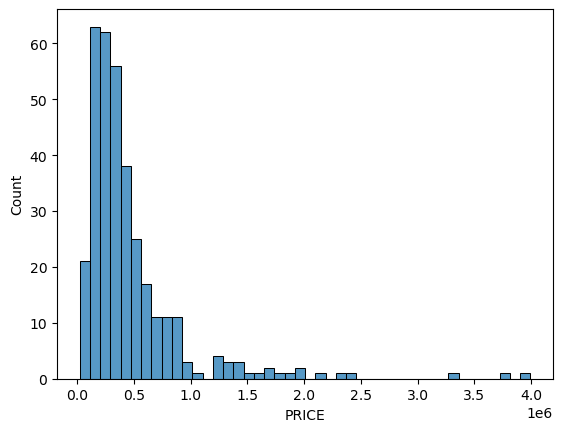

In [57]:
# plot price data
import seaborn as sns

sns.histplot(houses["PRICE"]);

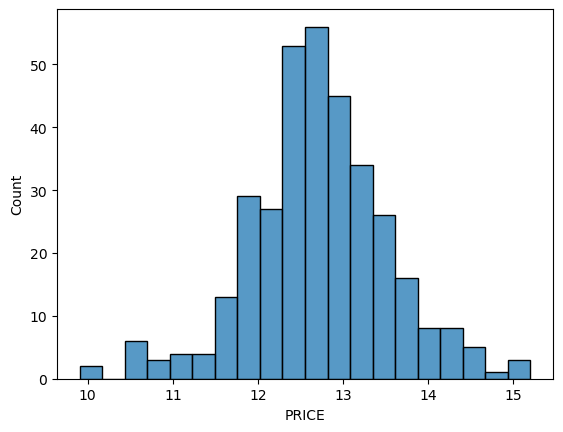

In [58]:
# take the log of price data
import numpy as np

sns.histplot(np.log(houses["PRICE"]));

#### b. Normalization and Standardization

In [65]:
beds = houses["BEDS"][:5]
beds

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: BEDS, dtype: float64

In [66]:
# normalization formula
(beds - beds.min()) / (beds.max() - beds.min())

0    0.0
1    0.5
2    0.0
3    0.0
4    1.0
Name: BEDS, dtype: float64

In [67]:
beds.min()

3.0

In [68]:
beds.max() - beds.min()

2.0

In [69]:
(beds - beds.min()) / (beds.max() - beds.min())

0    0.0
1    0.5
2    0.0
3    0.0
4    1.0
Name: BEDS, dtype: float64

In [70]:
beds

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: BEDS, dtype: float64

In [71]:
# standardization formula
(beds - beds.mean()) / beds.std()

0   -0.670820
1    0.447214
2   -0.670820
3   -0.670820
4    1.565248
Name: BEDS, dtype: float64

In [72]:
beds.mean()

3.6

In [73]:
beds.std()

0.8944271909999159

### c. Feature Engineering

In [64]:
# we've been doing feature engineering all along -- this is ready to be input into a model!

model_df

,customer,june_dog_food_purchases,total_spend,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies,days_between
0,Aiden,1.0,222.16,0,0,0,0,8,13
1,Ben,1.0,44.19,0,0,0,0,2,42
2,Calvin,1.0,29.99,0,0,0,0,1,16
3,Chloe,1.0,36.33,3,2,0,0,0,28
4,Lia,1.0,78.95,2,0,0,0,1,12
5,Lily,1.0,69.31,0,0,2,0,4,7
6,Olivia,1.0,68.03,1,1,0,0,2,12
7,Ava,0.0,43.97,0,4,0,0,0,31
8,Bennett,0.0,27.73,0,5,0,0,0,37
9,Blake,0.0,25.55,0,0,0,0,1,22


In [60]:
# feature engineering tips

# Anyone can apply an algorithm, but only someone with domain expertise can engineer
# relevant features, which is what makes a great model

# you want your data to be long, not wide
# (many rows, few columns)

# if you are working with customer data, a popular marketing technique
# is to engineer features related to the recency, frequency, and monetary value
# (RFM) of a customer's transactions

# Once you start modeling, you are bound to find things you missed during the
# data prep and will continue to engineer features and gather, clean, explore,
# and visualize the data